In [1]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/Users/Simon/GIT/GPlatesClassStruggle/')

from reconstruction_classes import *
from raster_reconstruction_classes import *
from worselands_utils import grdcontour2feature

%matplotlib inline
%load_ext autoreload
%autoreload 2



(721,) (361,) (361, 721)


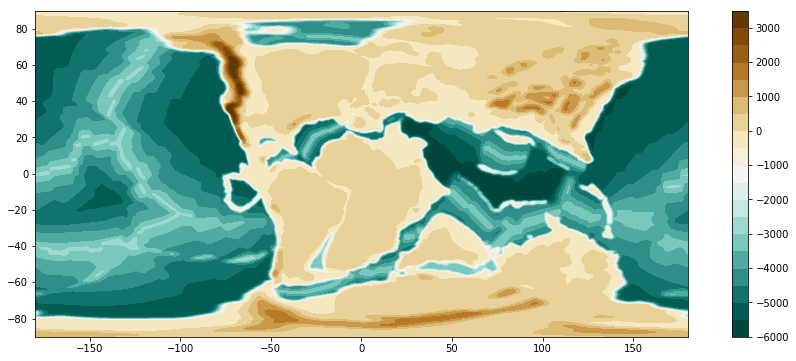

In [2]:
grdfile_template = '/Users/Simon/cloudstor/Shared/Paleotopography_Grids/paleotopobathy_smooth_%0.2fMa.nc'

reconstruction_time = 120
ptopo = GplatesRaster(grdfile_template % reconstruction_time)

print ptopo.gridX.shape, ptopo.gridY.shape, ptopo.gridZ.shape

ptopo.plot()


In [5]:
clevel = 0

polygon_list = []
for reconstruction_time in np.arange(0,201,1):
    
    polygons = grdcontour2feature(grdfile_template % reconstruction_time,clevel)
    
    for polygon in polygons:
        polygon.set_valid_time(reconstruction_time+0.5,reconstruction_time-0.4999)
        polygon_list.append(polygon)
    
pygplates.FeatureCollection(polygon_list).write('paleoshorelines_M2016.gpmlz')
    